In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Copy of 233X_salaries_in_different_countries.csv")
df.head()

,Name,Year,Salary,Department,Country,Bonus
0,Charlie Brown,2021,"$38,000.00",Marketing,United States,"$1,900.00"
1,Alice Johnson,2021,"$32,000.00",Sales,United States,"$1,600.00"
2,Bob Smith,2021,"$35,000.00",Engineering,Canada,"$1,750.00"
3,Jack Adams,2021,"$70,000.00",Engineering,Australia,"$3,500.00"
4,Michael Harris,2021,"$85,000.00",Operations,United States,"$4,250.00"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        34 non-null     object
 1   Year        34 non-null     int64 
 2   Salary      34 non-null     object
 3   Department  34 non-null     object
 4   Country     34 non-null     object
 5   Bonus       34 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.7+ KB


In [4]:
df.shape

(34, 6)

In [5]:
df.describe()

,Year
count,34.000000
mean,2021.558824
std,0.503995
min,2021.000000
25%,2021.000000
50%,2022.000000
75%,2022.000000
max,2022.000000


In [6]:
df.Year.value_counts()

Year
2022    19
2021    15
Name: count, dtype: int64

In [7]:
df.Country.value_counts()

Country
United States     6
Canada            6
Germany           6
France            6
Australia         5
United Kingdom    5
Name: count, dtype: int64

In [8]:
df.Department.value_counts()

Department
Engineering    7
HR             7
Sales          6
Marketing      5
IT             5
Operations     4
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        34 non-null     object
 1   Year        34 non-null     int64 
 2   Salary      34 non-null     object
 3   Department  34 non-null     object
 4   Country     34 non-null     object
 5   Bonus       34 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.7+ KB


In [10]:
# Convert salary columns to numeric type
df['Salary'] = df['Salary'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the interquartile range (IQR) for salaries
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (salaries beyond the lower and upper bounds)
outliers_low = df[df['Salary'] < lower_bound]
outliers_high = df[df['Salary'] > upper_bound]

print("Outliers in terms of exceptionally low salaries:")
print(outliers_low[['Name', 'Year', 'Salary']])

print("\nOutliers in terms of exceptionally high salaries:")
print(outliers_high[['Name', 'Year', 'Salary']])

Outliers in terms of exceptionally low salaries:
Empty DataFrame
Columns: [Name, Year, Salary]
Index: []

Outliers in terms of exceptionally high salaries:
              Name  Year    Salary
14   Natalie Green  2021  255000.0
33  Benjamin Clark  2022  240000.0


In [11]:
df.describe()

,Year,Salary
count,34.000000,34.000000
mean,2021.558824,103117.647059
std,0.503995,53322.213636
min,2021.000000,32000.000000
25%,2021.000000,65000.000000
50%,2022.000000,95000.000000
75%,2022.000000,132500.000000
max,2022.000000,255000.000000


count        34.000000
mean     103117.647059
std       53322.213636
min       32000.000000
25%       65000.000000
50%       95000.000000
75%      132500.000000
max      255000.000000
Name: Salary, dtype: float64


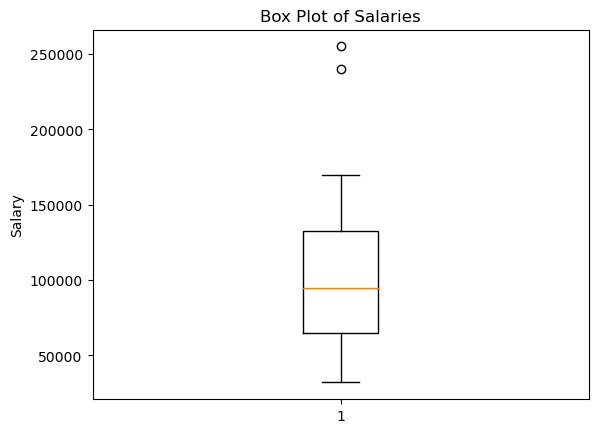

In [12]:
# Clean the 'Bonus' column
df['Bonus'] = df['Bonus'].str.replace(',', '').str.replace('$', '')
df['Bonus'] = pd.to_numeric(df['Bonus'])

# Calculate descriptive statistics for the cleaned 'Salary' column
salary_stats = df['Salary'].describe()
print(salary_stats)

# Create a box plot of the cleaned 'Salary' column
plt.boxplot(df['Salary'])
plt.title('Box Plot of Salaries')
plt.ylabel('Salary')
plt.show()

In [13]:
# 1. Calculate the interquartile range (IQR) of the 'Salary' column.
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# 2. Calculate the upper outlier threshold
upper_threshold = Q3 + 1.5 * IQR

# 3. Calculate the lower outlier threshold
lower_threshold = Q1 - 1.5 * IQR

# 4. Filter the DataFrame and display outlier rows
outlier_df = df[(df['Salary'] > upper_threshold) | (df['Salary'] < lower_threshold)]
print(outlier_df) 

              Name  Year    Salary  Department  Country    Bonus
14   Natalie Green  2021  255000.0          HR  Germany  12750.0
33  Benjamin Clark  2022  240000.0  Operations   Canada  12000.0


In [14]:
# Calculate total salary expenditure for each department
total_salary_by_department = df.groupby('Department')['Salary'].sum()

# Calculate total salary expenditure for each country
total_salary_by_country = df.groupby('Country')['Salary'].sum()

print("Total salary expenditure by department:")
print(total_salary_by_department)

print("\nTotal salary expenditure by country:")
print(total_salary_by_country)

Total salary expenditure by department:
Department
Engineering    675000.0
HR             799000.0
IT             472000.0
Marketing      368000.0
Operations     560000.0
Sales          632000.0
Name: Salary, dtype: float64

Total salary expenditure by country:
Country
Australia         367000.0
Canada            665000.0
France            689000.0
Germany           780000.0
United Kingdom    535000.0
United States     470000.0
Name: Salary, dtype: float64
